<h3>스스로해보기-9</h3>

In [ ]:
# setting
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np 
import seaborn as sns

plt.rcParams['font.family'] = "HCR Dotum"

In [6]:
# 1
df = pd.read_excel("서울시지하철-25-11.xlsx")
df['date'] = df['date'].astype(str)
df['day'] = df['date'].str[6:8]
df['day'] = df['day'].astype(int)

df.tail()

,date,line,stn,geton,getoff,day
18506,20251130,중앙선,오빈,207,203,30
18507,20251130,중앙선,양평,2838,2686,30
18508,20251130,중앙선,원덕,398,345,30
18509,20251130,중앙선,용문,3744,3399,30
18510,20251130,중앙선,지평,70,114,30


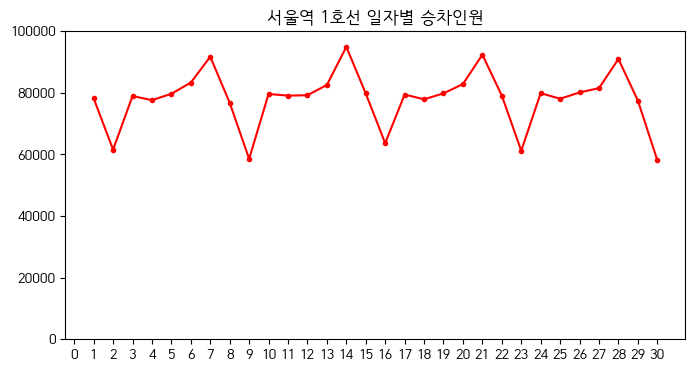

In [34]:
# 2 

seoul1 = df[(df['stn'] == '서울역') & (df['line'] == '1호선')]

fig, ax = plt.subplots(figsize=(8,4))

ax.plot(seoul1['day'], seoul1['geton'], "ro-", markersize=3)
ax.set_xticks(np.arange(0,31))
ax.set_ylim(0,100000)
ax.set_title("서울역 1호선 일자별 승차인원")

plt.show()

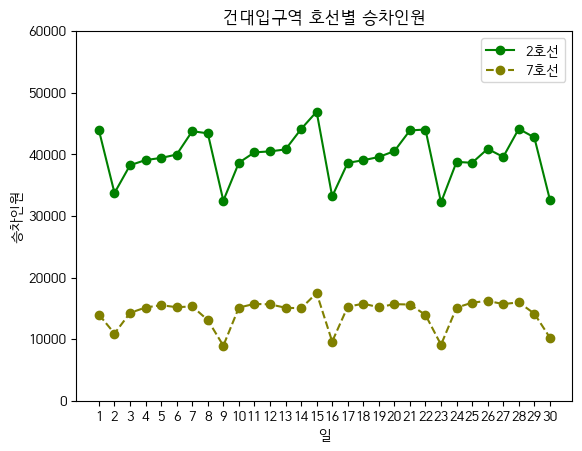

In [ ]:
# 3 
ku2 = df[(df['stn'] == '건대입구') & (df['line'] == '2호선')]
ku7 = df[(df['stn'] == '건대입구') & (df['line'] == '7호선')]

fig, ax = plt.subplots()
ax.plot(ku2['day'], ku2['geton'], "go-", label = '2호선')
ax.plot(ku7['day'], ku7['geton'], "o--", color='olive', label='7호선')
ax.set_xticks(np.arange(1,31))
ax.set_ylim(0,60000)

ax.set_title("건대입구역 호선별 승차인원")
ax.legend()
ax.set_xlabel("일")
ax.set_ylabel("승차인원")

plt.show()

Text(0.5, 1.0, '1-9호선 일 평균 승차 인원 2025년 11월')

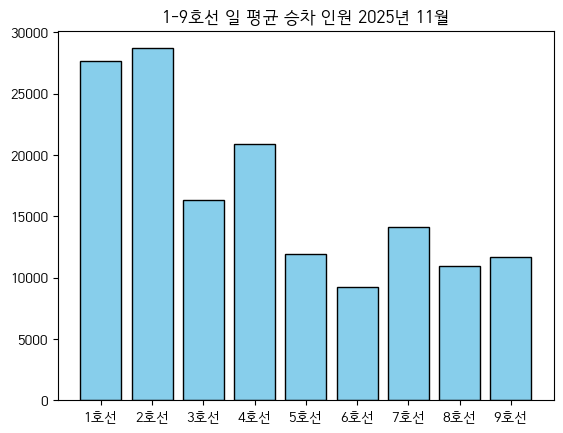

In [109]:
# 4
list9 = [f"{i}호선" for i in range(1, 10)]
line9 = df[df['line'].isin(list9)]
grp = line9.groupby('line')
grp9 = round(grp[['geton']].aggregate('mean'),1).reset_index() # reset_index() 컬럼 추출
grp9.columns = ['line', 'mean']

fig, ax = plt.subplots()
ax.bar(grp9['line'], grp9['mean'], color='skyblue', edgecolor='black')
ax.set_title("1-9호선 일 평균 승차 인원 2025년 11월")



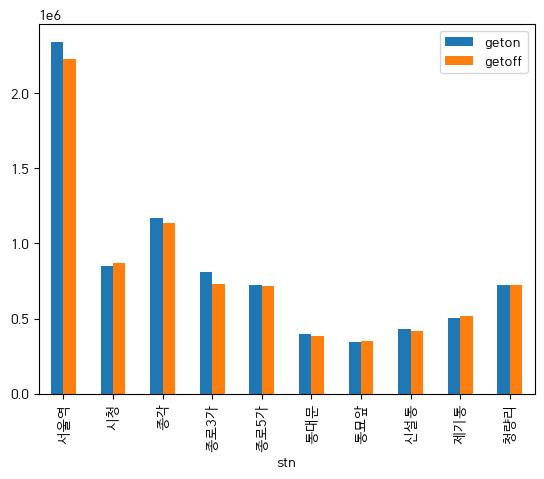

In [146]:
# 5

line1 = df[df['line'] == '1호선']
result = line1.groupby('stn')[['geton', 'getoff']].agg('sum').iloc[[2,3,6,7,8,0,1,4,5,9],:]
result = result.rename(index = {'청량리(서울시립대입구)': '청량리'})

result.plot.bar()
plt.show()




